In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [3]:
titanic.shape

(891, 15)

In [4]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
titanic = titanic.drop('deck', axis = 1)
titanic = titanic.dropna()
titanic.shape

(712, 14)

In [6]:
titanic.select_dtypes(exclude= ['int', 'float'])

,sex,embarked,class,who,adult_male,embark_town,alive,alone
0,male,S,Third,man,True,Southampton,no,False
1,female,C,First,woman,False,Cherbourg,yes,False
2,female,S,Third,woman,False,Southampton,yes,True
3,female,S,First,woman,False,Southampton,yes,False
4,male,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...
885,female,Q,Third,woman,False,Queenstown,no,False
886,male,S,Second,man,True,Southampton,no,True
887,female,S,First,woman,False,Southampton,yes,True
889,male,C,First,man,True,Cherbourg,yes,True


In [7]:
for column in titanic.select_dtypes(exclude= ['int', 'float']):
    column_series = titanic[column]
    print(column.upper())
    print(column_series.value_counts())
    print("_" * 20)


SEX
male      453
female    259
Name: sex, dtype: int64
____________________
EMBARKED
S    554
C    130
Q     28
Name: embarked, dtype: int64
____________________
CLASS
Third     355
First     184
Second    173
Name: class, dtype: int64
____________________
WHO
man      413
woman    216
child     83
Name: who, dtype: int64
____________________
ADULT_MALE
True     413
False    299
Name: adult_male, dtype: int64
____________________
EMBARK_TOWN
Southampton    554
Cherbourg      130
Queenstown      28
Name: embark_town, dtype: int64
____________________
ALIVE
no     424
yes    288
Name: alive, dtype: int64
____________________
ALONE
True     402
False    310
Name: alone, dtype: int64
____________________


In [8]:
#mapping

map_dict = {
    'First':0,
    'Second': 1,
    'Third': 2 
}

titanic['class'] = titanic['class'].map(map_dict)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,2,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,0,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,2,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,0,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,2,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,2,woman,False,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,1,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,0,woman,False,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,0,man,True,Cherbourg,yes,True


In [9]:
#label encoder

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()


embarked_encoded = label_encoder.fit_transform(titanic["embarked"])

titanic["embarked"] = embarked_encoded
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,2,2,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,0,0,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,2,2,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,2,0,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,2,2,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,1,2,woman,False,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,2,1,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,2,0,woman,False,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,0,0,man,True,Cherbourg,yes,True


In [10]:
#one hot

dummies = pd.get_dummies(titanic['embark_town'])
titanic = pd.concat([titanic.drop('embark_town',axis=1),dummies],axis=1)
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alive,alone,Cherbourg,Queenstown,Southampton
0,0,3,male,22.0,1,0,7.2500,2,2,man,True,no,False,0,0,1
1,1,1,female,38.0,1,0,71.2833,0,0,woman,False,yes,False,1,0,0
2,1,3,female,26.0,0,0,7.9250,2,2,woman,False,yes,True,0,0,1
3,1,1,female,35.0,1,0,53.1000,2,0,woman,False,yes,False,0,0,1
4,0,3,male,35.0,0,0,8.0500,2,2,man,True,no,True,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,1,2,woman,False,no,False,0,1,0
886,0,2,male,27.0,0,0,13.0000,2,1,man,True,no,True,0,0,1
887,1,1,female,19.0,0,0,30.0000,2,0,woman,False,yes,True,0,0,1
889,1,1,male,26.0,0,0,30.0000,0,0,man,True,yes,True,1,0,0


In [30]:
#ordinal encoder

titan = sns.load_dataset("titanic")
titan = titan.dropna()


In [34]:
from sklearn.preprocessing import OrdinalEncoder
ordinal = OrdinalEncoder()

embarked_encoded = ordinal.fit_transform(titan[["embarked"]])
titan['embarked'] = embarked_encoded
titan["embarked"].value_counts()



2.0    115
0.0     65
1.0      2
Name: embarked, dtype: int64

In [37]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

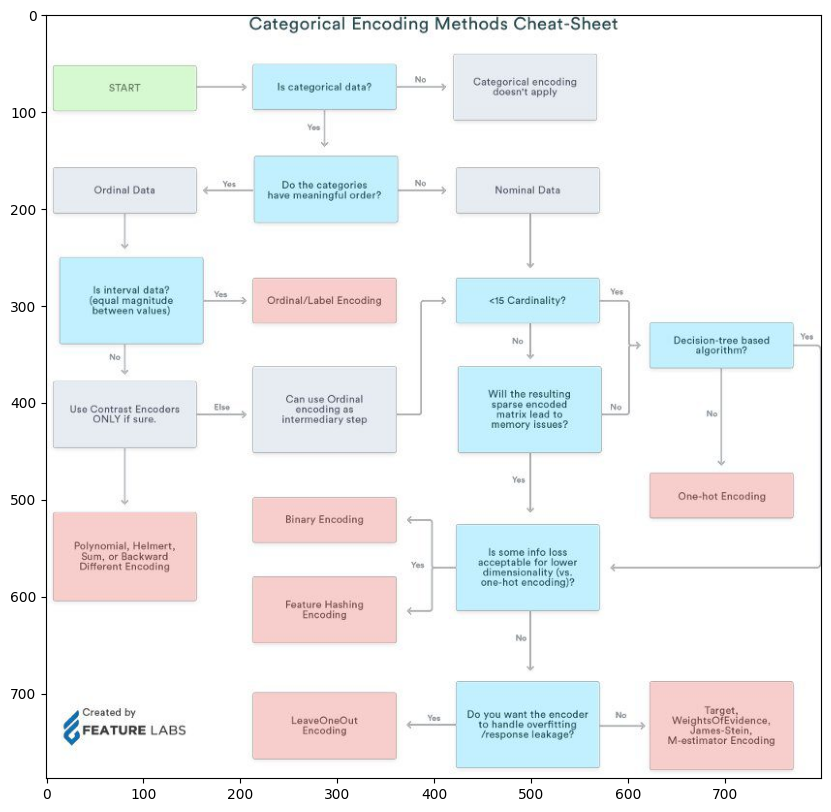

In [41]:
image = mpimg.imread("C:\\Users\\Lenovo\\Desktop\\garg_cat_variables_15.jpg")
fig, ax = plt.subplots(figsize = (10,10))
ax.imshow(image)
plt.show()
